In [251]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [252]:
raw_data = pd.read_csv('train.csv')

In [253]:
raw_data.shape

(1460, 81)

In [254]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [255]:
pd.set_option('max_columns', None)

In [256]:
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [257]:
raw_data.drop('Id', axis=1, inplace=True)

## Data Cleaning

### Handling Missing Values

In [258]:
raw_data.columns[raw_data.isnull().sum()>0.25]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [259]:
# Dropping columns where more than 25% of values are missing
raw_data.drop(raw_data.columns[raw_data.isnull().sum()>0.25], axis = 1, inplace=True)

In [260]:
raw_data.shape

(1460, 61)

In [261]:
raw_data.columns[raw_data.isnull().sum()>0]

Index([], dtype='object')

## EDA and Data Visualization

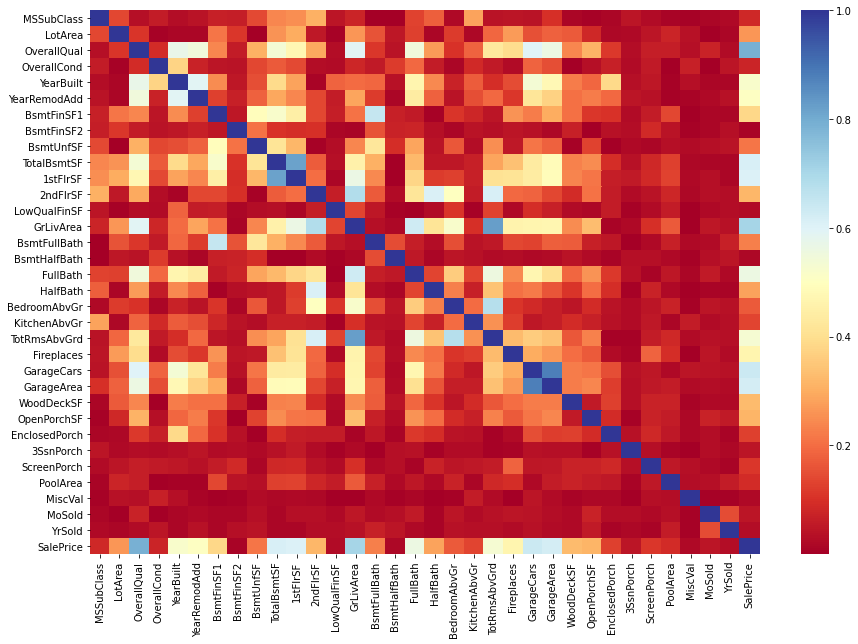

In [262]:
plt.figure(figsize=[15,10])
sns.heatmap(abs(raw_data.corr()), cmap = 'RdYlBu')
plt.show()

In [263]:
raw_data.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


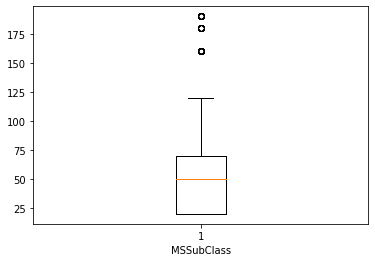

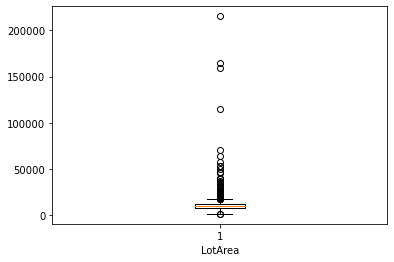

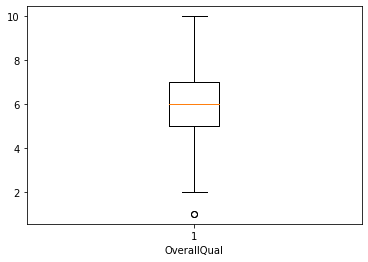

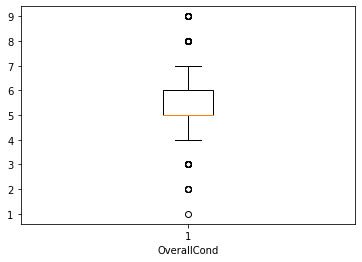

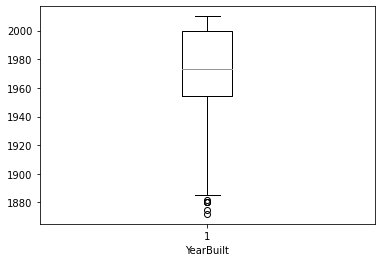

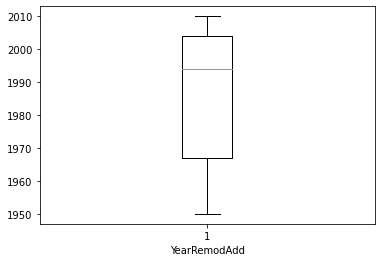

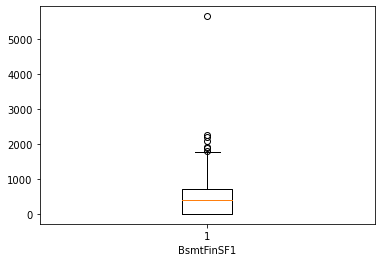

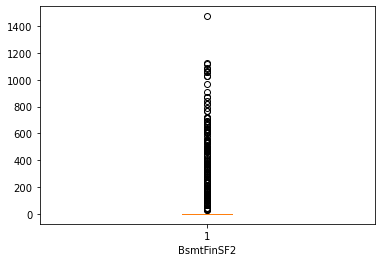

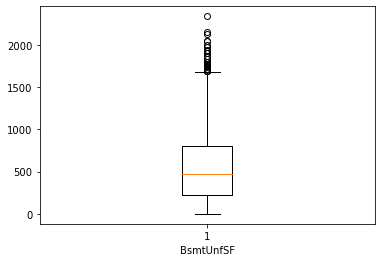

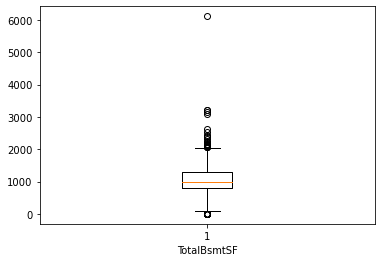

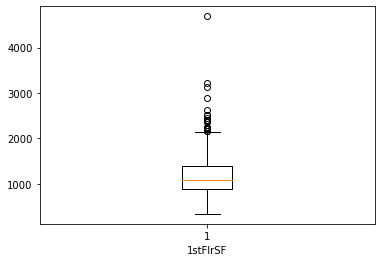

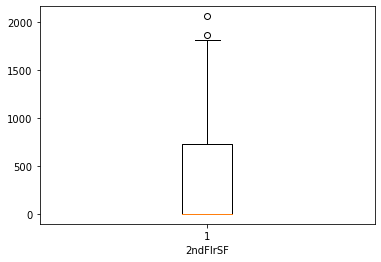

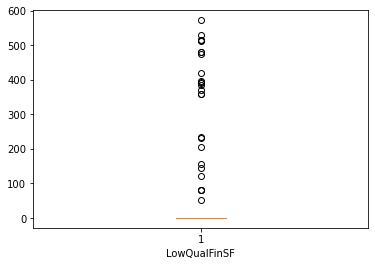

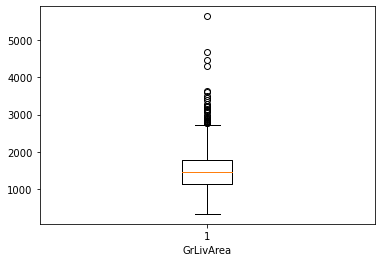

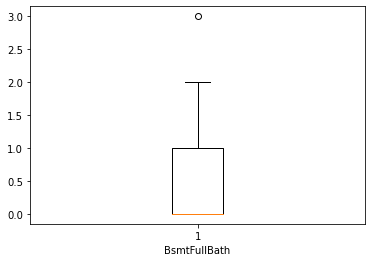

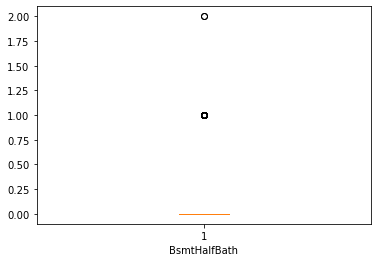

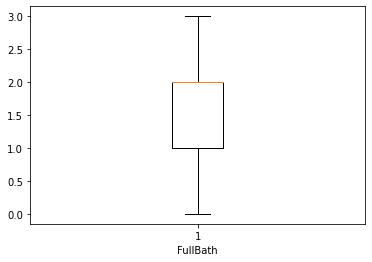

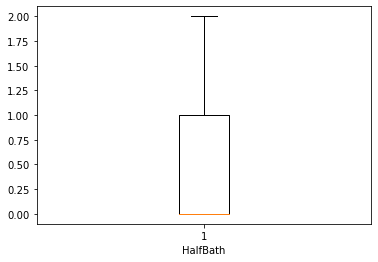

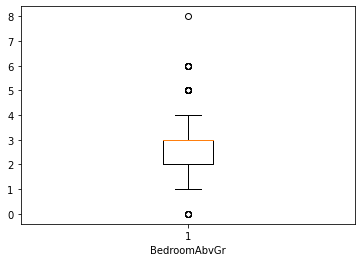

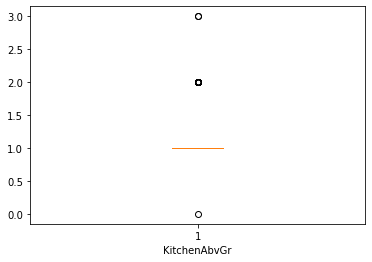

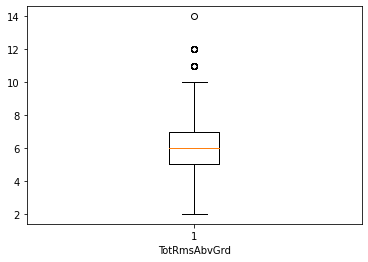

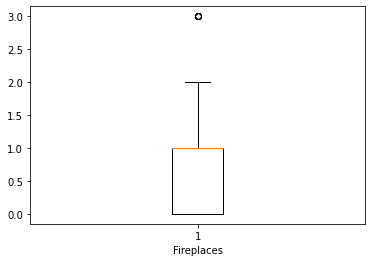

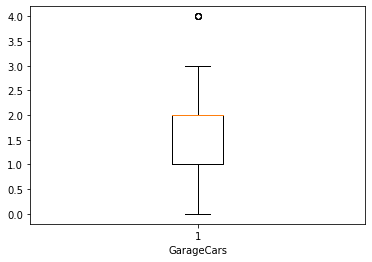

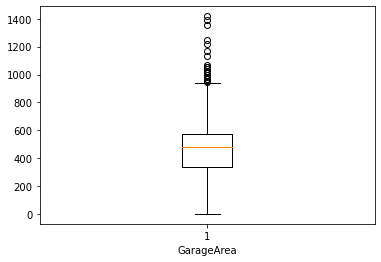

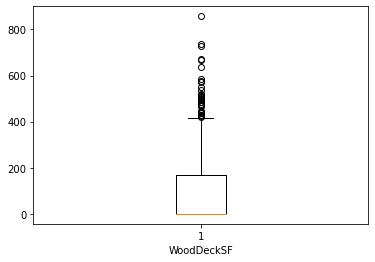

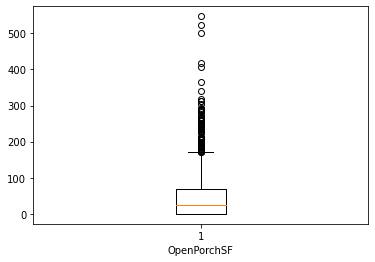

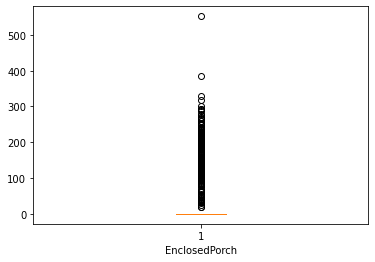

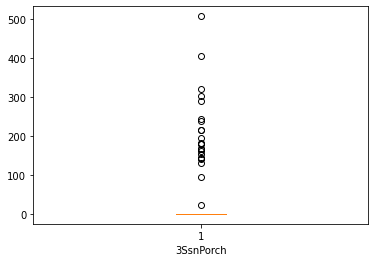

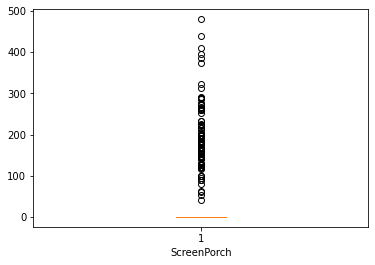

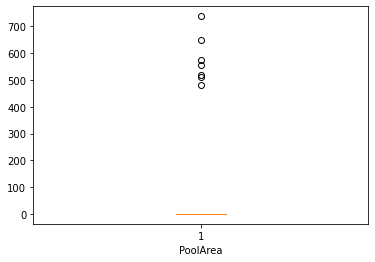

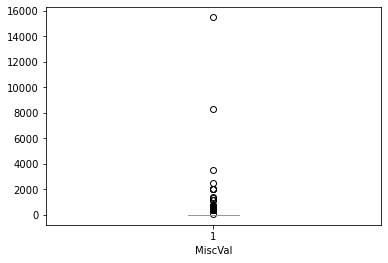

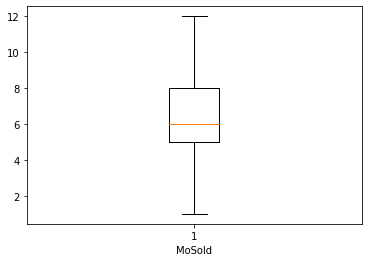

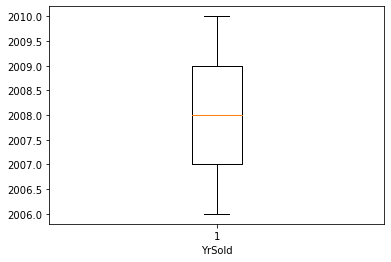

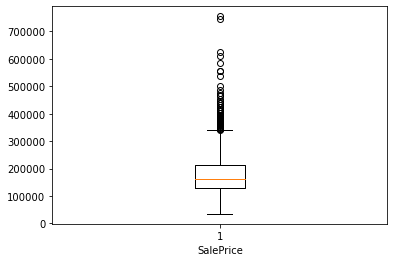

In [264]:
for col in raw_data.select_dtypes(include='number').columns:
    plt.boxplot(raw_data[col])
    plt.xlabel(col)
    plt.show()

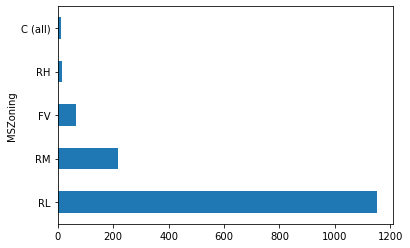

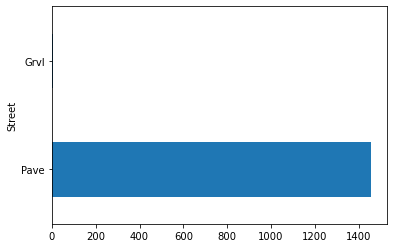

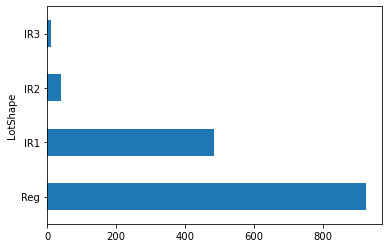

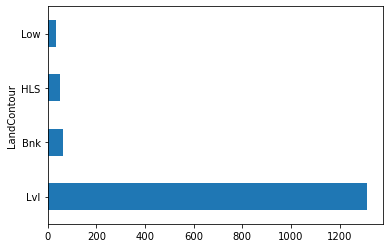

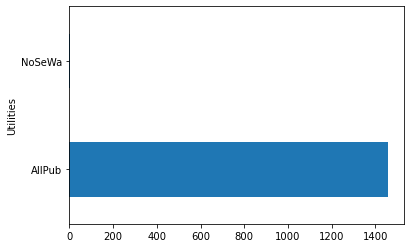

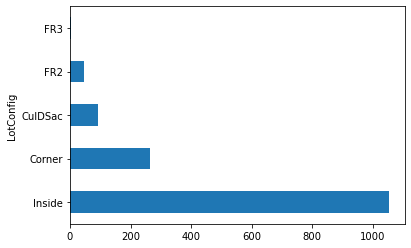

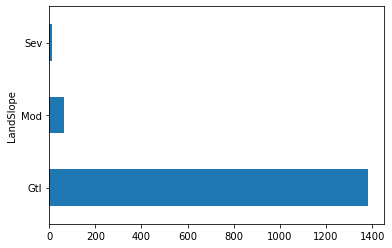

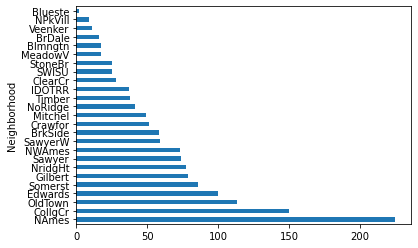

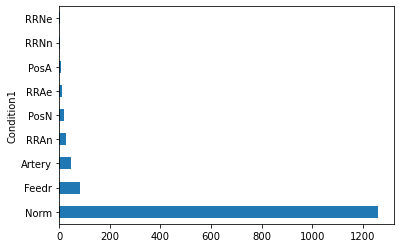

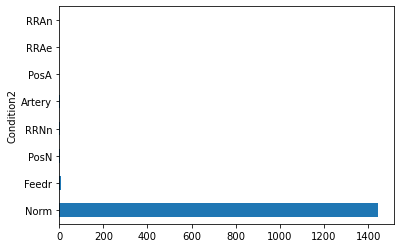

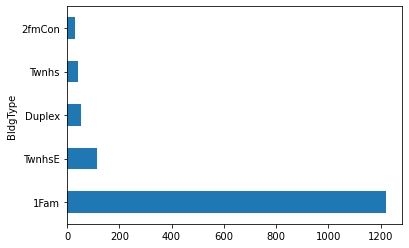

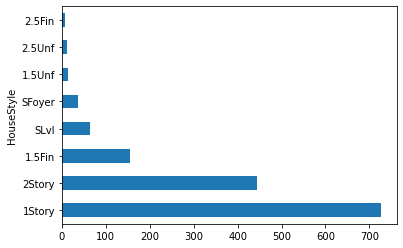

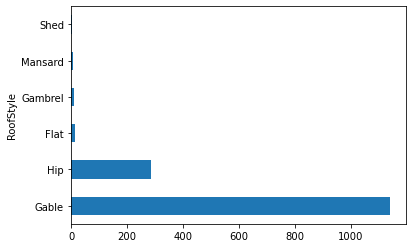

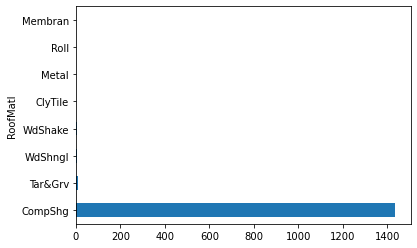

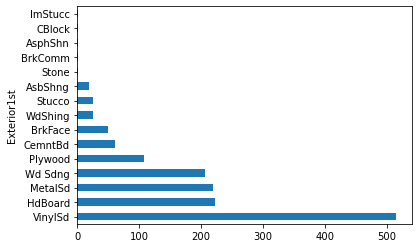

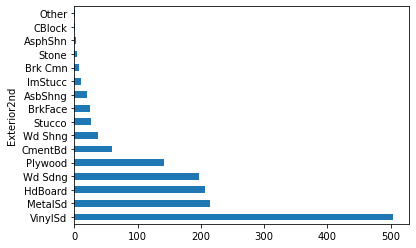

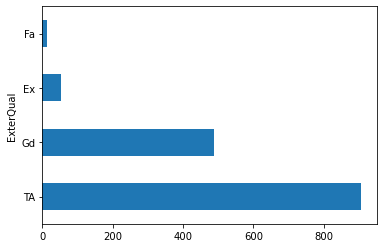

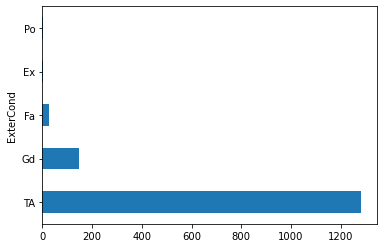

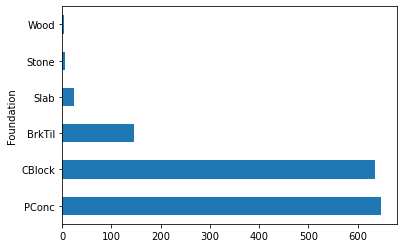

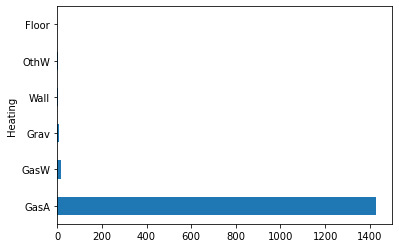

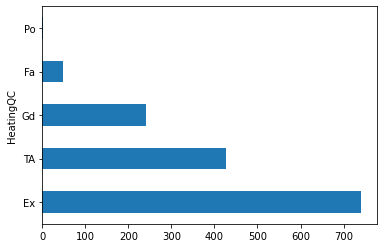

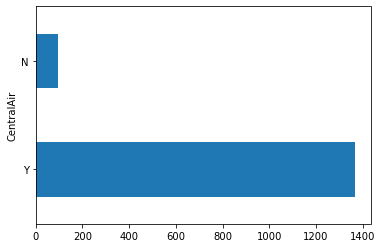

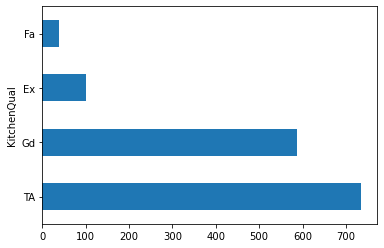

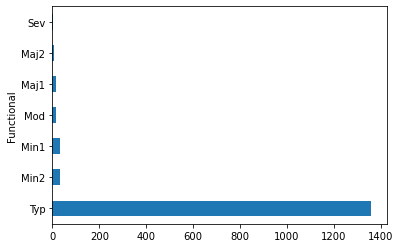

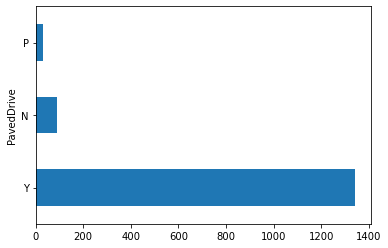

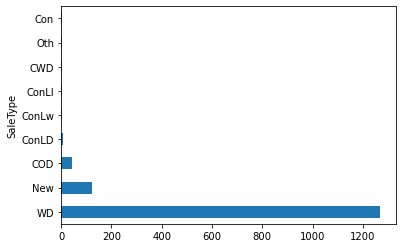

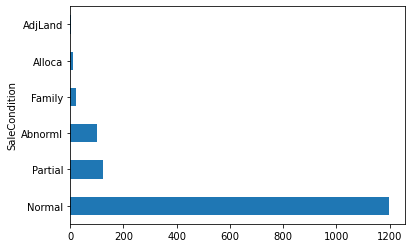

In [265]:
for col in raw_data.select_dtypes(exclude='number'):
    raw_data[col].value_counts().plot.barh()
    plt.ylabel(col)
    plt.show()

### EDA Observations
There are clearly outliers in the numeric variables which might need to be treated. In case of numeric variables, certain levels in particular classes dominated the distribution in of the class levels. Instead of cleaning the data right away, we will first build a base model to obtain a baseline performance of linear regression for the house price prediction problem.

## Building Base Linear Regression Model

### Preparing Dataset

In [266]:
base_df = raw_data.copy()

In [267]:
base_df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,0,0,953,953,GasA,Ex,Y,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,2,460,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,790,163,589,1542,GasA,TA,Y,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,2,500,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,Ex,Gd,Stone,275,0,877,1152,GasA,Ex,Y,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,1,252,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,49,1029,0,1078,GasA,Gd,Y,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,1,240,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [268]:
for col in base_df.select_dtypes(exclude='number').columns:
    if len(base_df[col].value_counts()) == 2:
        m = {base_df[col].value_counts().index[0]:0, base_df[col].value_counts().index[0]:1}
        base_df[col] = base_df[col].map(m)

In [269]:
base_df.shape

(1460, 61)

In [270]:
dummies_df = pd.get_dummies(base_df[base_df.select_dtypes(exclude='number').columns], drop_first = True)
dummies_df.shape

(1460, 152)

In [271]:
base_df = pd.concat([base_df, dummies_df], axis = 1)
base_df.shape

(1460, 213)

In [272]:
base_df.drop(base_df.select_dtypes(exclude = 'number').columns, axis = 1, inplace = True)
base_df.shape

(1460, 189)

In [273]:
base_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 189 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    MSSubClass             int64  
 1    LotArea                int64  
 2    Street                 float64
 3    Utilities              float64
 4    OverallQual            int64  
 5    OverallCond            int64  
 6    YearBuilt              int64  
 7    YearRemodAdd           int64  
 8    BsmtFinSF1             int64  
 9    BsmtFinSF2             int64  
 10   BsmtUnfSF              int64  
 11   TotalBsmtSF            int64  
 12   CentralAir             float64
 13   1stFlrSF               int64  
 14   2ndFlrSF               int64  
 15   LowQualFinSF           int64  
 16   GrLivArea              int64  
 17   BsmtFullBath           int64  
 18   BsmtHalfBath           int64  
 19   FullBath               int64  
 20   HalfBath               int64  
 21   BedroomAbvGr           int64  
 22 

In [274]:
base_df.isnull().sum()

MSSubClass               0
LotArea                  0
Street                   6
Utilities                1
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 189, dtype: int64

In [275]:
base_df.dropna(inplace=True)

In [276]:
base_df.shape

(1360, 189)

High-dimensionality of the dataset will surely impact model performance

### Building LinearRegression Model

In [277]:
y = base_df.pop('SalePrice')
X = base_df

In [278]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[X.columns] = scaler.fit_transform(X_train)
X_test[X.columns] = scaler.transform(X_test)

In [279]:
from sklearn.linear_model import LinearRegression

In [280]:
base_lg = LinearRegression()
base_lg.fit(X_train, y_train)
y_train_pred = base_lg.predict(X_train)
y_test_pred = base_lg.predict(X_test)

In [281]:
from sklearn.metrics import r2_score, mean_squared_error

In [282]:
print('Train Scores:')
print('R2:',r2_score(y_train, y_train_pred))
print('MSE:',mean_squared_error(y_train,y_train_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Mean Sale Price',y_train.mean())

Train Scores:
R2: 0.9201185085466163
MSE: 495816301.38001204
RMSE: 22266.932913628047
Mean Sale Price 186573.671875


### Residual Analysis

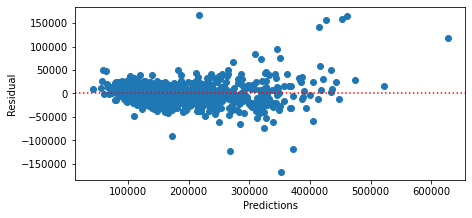

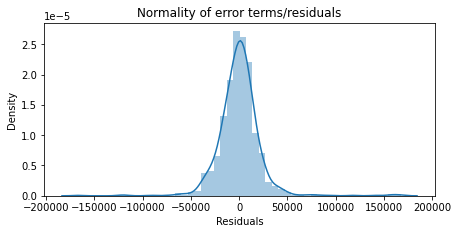

In [283]:
y_train_res = y_train - y_train_pred

plt.figure(figsize=[7,7])
plt.subplot(211)
plt.scatter( y_train_pred , y_train_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

plt.figure(figsize=[7,7])
plt.subplot(212)
p = sns.distplot(y_train_res,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [284]:
print('Test Scores:')
print('R2:',r2_score(y_test, y_test_pred))
print('MSE:',mean_squared_error(y_test,y_test_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('Mean Sale Price',y_train.mean())

Test Scores:
R2: -2.3361884087242234e+17
MSE: 1.4579408139922737e+27
RMSE: 38182991160885.68
Mean Sale Price 186573.671875


### Overfitting Base Model
Model was expected to overfit because of the high dimensionality of the data. Feature engineering needs to be performed to ensure that the linear regression model. Feature engineering could be done in the following manner:
- Data Transformation
- Feature Selection
- Lasso and Ridge Regression

## Regularization of Base Model (Lasso)

In [285]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [286]:
lasso = Lasso()

params = {'alpha':[0.01,0.1,1,10]}

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.01, 0.1, 1, 10]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [287]:
model_cv_lasso.best_params_

{'alpha': 10}

In [288]:
lasso = Lasso(alpha=10)
lasso.fit(X_train,y_train)
lasso.coef_

array([-1.66761489e+04,  1.45965745e+05,  0.00000000e+00,  0.00000000e+00,
        7.08478765e+04,  3.99355749e+04,  3.90071417e+04,  3.11722338e+03,
        1.16128750e+05,  1.22678155e+04, -0.00000000e+00,  4.16269441e+04,
        0.00000000e+00,  2.77924193e+03,  1.48918999e+04, -1.02963633e+03,
        2.77675136e+05,  1.05668459e+04,  1.17237251e+02,  1.31075443e+04,
       -1.52606378e+02, -2.05135870e+04, -0.00000000e+00,  8.49797627e+03,
        5.94745514e+03,  1.45030268e+04,  2.06275879e+04,  1.27969779e+04,
        5.67197072e+03, -3.12556494e+01,  8.71438902e+03,  1.29285948e+04,
        5.57659235e+04, -8.00085408e+03, -6.19254952e+03, -1.30037474e+03,
        2.48582641e+03,  7.63427941e+03, -0.00000000e+00,  1.25409728e+02,
        4.88200240e+03, -3.46411675e+03,  1.16072851e+03,  2.15420491e+04,
        1.65812108e+03,  1.60185326e+04,  1.09669056e+04, -3.46182288e+03,
       -1.18773252e+04, -8.02852469e+02,  1.37150649e+04, -2.17424658e+04,
       -0.00000000e+00,  

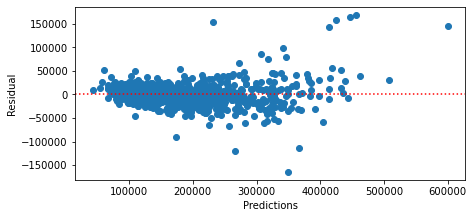

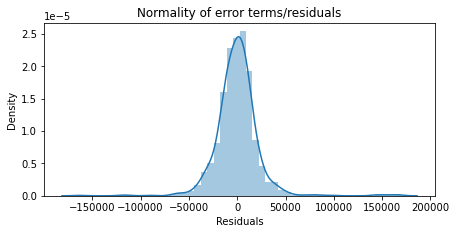

In [290]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

y_train_res = y_train - y_train_pred

plt.figure(figsize=[7,7])
plt.subplot(211)
plt.scatter( y_train_pred , y_train_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

plt.figure(figsize=[7,7])
plt.subplot(212)
p = sns.distplot(y_train_res,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

print('Train Scores:')
print('R2:',r2_score(y_train, y_train_pred))
print('MSE:',mean_squared_error(y_train,y_train_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Mean Sale Price',y_train.mean(),'\n')

print('Test Scores:')
print('R2:',r2_score(y_test, y_test_pred))
print('MSE:',mean_squared_error(y_test,y_test_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Train Scores:
R2: 0.9173624959842613
MSE: 512922591.33982176
RMSE: 22647.794403425287
Mean Sale Price 186573.671875 

Test Scores:
R2: 0.7363711791406031
MSE: 1645223545.4993386
RMSE: 40561.35532128258


Performance of lasso regression has clearly increased when tested on the unseen data. From the residual plots, we can see that the residuals are unexpectedly high for higher sale prices. Let's plot the distribution of salesprices to figure out if any transformations are necessary.

## Data Transformation

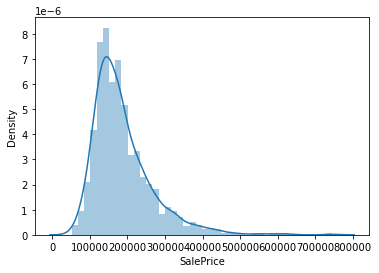

In [293]:
sns.distplot(y_train)
plt.show()

Trying log transformation since the distribution is heavily right-tailed

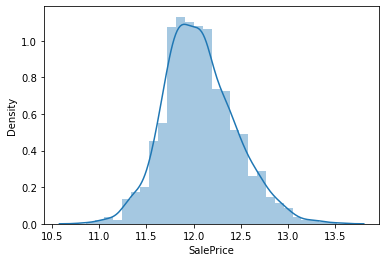

In [294]:
sns.distplot(np.log(y_train))
plt.show()

In [297]:
y_train

1401    193000
1161    224000
71      129500
257     220000
263     130000
         ...  
1232    101800
117     155000
1120    118400
1205    271900
1445    129000
Name: SalePrice, Length: 1088, dtype: int64

In [301]:
lasso.fit(X_train,np.log(y_train))

Lasso(alpha=10)

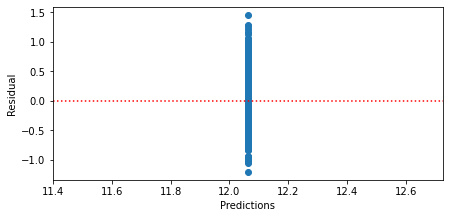

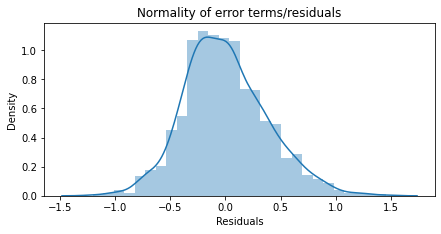

Train Scores:
R2: 0.0
MSE: 0.1410506148980397
RMSE: 0.37556705779133465
Mean Sale Price 186573.671875 

Test Scores:
R2: -7.214817836653786e-05
MSE: 0.13000633705132913
RMSE: 0.36056391534834586


In [303]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

y_train_res = np.log(y_train) - y_train_pred

plt.figure(figsize=[7,7])
plt.subplot(211)
plt.scatter( y_train_pred , y_train_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

plt.figure(figsize=[7,7])
plt.subplot(212)
p = sns.distplot(y_train_res,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

print('Train Scores:')
print('R2:',r2_score(np.log(y_train), y_train_pred))
print('MSE:',mean_squared_error(np.log(y_train),y_train_pred))
print('RMSE:',np.sqrt(mean_squared_error(np.log(y_train),y_train_pred)))
print('Mean Sale Price',y_train.mean(),'\n')

print('Test Scores:')
print('R2:',r2_score(np.log(y_test), y_test_pred))
print('MSE:',mean_squared_error(np.log(y_test),y_test_pred))
print('RMSE:',np.sqrt(mean_squared_error(np.log(y_test),y_test_pred)))